## Machine Learning: Neural Network

*Prepared by:*  
**Jude Michael Teves**  
Faculty, Software Technology Department  
College of Computer Studies - De La Salle University

## Preliminaries

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split

import seaborn as sns

sns.set_style('darkgrid')

sns.set_palette('Set2')
sns.color_palette('Set2')

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

## Neural Network using sklearn

Neural networks can be configured to solve classification and regression problems. We'll be showing examples of them in the following cells.

### Classification

We'll be using the MLPClassifier class in sklearn. For more details, see this <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html">link</a>.

There are so many hyperparameters that we can configure, but for now, we will only be configuring the following: 
- layer and node sizes
- activation function
- learning rate
- number of epochs

In [48]:
X, y = datasets.load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Original Size | Input: {X.shape}, Output: {y.shape}")
print(f"Train Set Size | Input: {X_train.shape}, Output: {y_train.shape}")
print(f"Test Set Size | Input: {X_test.shape}, Output: {y_test.shape}")

Original Size | Input: (1797, 64), Output: (1797,)
Train Set Size | Input: (1437, 64), Output: (1437,)
Test Set Size | Input: (360, 64), Output: (360,)


In [49]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(16, 2), activation='relu', learning_rate_init=0.001, 
                        max_iter=200, random_state=42)
model.fit(X_train, y_train)
score_train = model.score(X_train, y_train)
score_test = model.score(X_test, y_test)
print(f"Train Set Accuracy: {score_train}")
print(f"Test Set Accuracy: {score_test}")

Train Set Accuracy: 0.6924147529575505
Test Set Accuracy: 0.6444444444444445


#### Scaling our data

It is generally a good practice to scale the data first as it improves the convergence.

In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = MLPClassifier(hidden_layer_sizes=(16, 2), activation='relu', learning_rate_init=0.001, 
                        max_iter=200, random_state=42)
model_scaled.fit(X_train_scaled, y_train)
score_train = model_scaled.score(X_train_scaled, y_train)
score_test = model_scaled.score(X_test_scaled, y_test)
print(f"Train Set Accuracy: {score_train}")
print(f"Test Set Accuracy: {score_test}")

Train Set Accuracy: 0.7543493389004872
Test Set Accuracy: 0.7083333333333334


We can see that the losses/scores improved.

[]

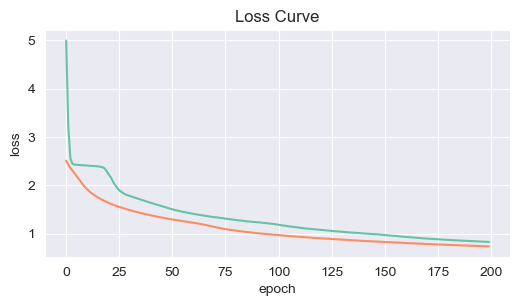

In [53]:
fig, ax = plt.subplots(1,1, figsize=(6,3), dpi=100)
ax.plot(model.loss_curve_, label="Train Set")
ax.plot(model_scaled.loss_curve_, label="Scaled Train Set")

plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('Loss Curve')
plt.plot()

### Regression

We'll be using the MLPRegressor class in sklearn. For more details, see this <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html">link</href>.

In [149]:
X, y = datasets.load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Original Size | Input: {X.shape}, Output: {y.shape}")
print(f"Train Set Size | Input: {X_train.shape}, Output: {y_train.shape}")
print(f"Test Set Size | Input: {X_test.shape}, Output: {y_test.shape}")

Original Size | Input: (506, 13), Output: (506,)
Train Set Size | Input: (404, 13), Output: (404,)
Test Set Size | Input: (102, 13), Output: (102,)


In [150]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=(32, 3), activation='relu', learning_rate_init=0.001, 
                        max_iter=200, random_state=42)
model.fit(X_train, y_train)
score_train = model.score(X_train, y_train)
score_test = model.score(X_test, y_test)
print(f"Train Set R-Squared: {score_train}")
print(f"Test Set R-Squared: {score_test}")

Train Set R-Squared: 0.257011604242119
Test Set R-Squared: 0.3029812583701724


#### Scaling our data

In [151]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = MLPRegressor(hidden_layer_sizes=(32, 3), activation='relu', learning_rate_init=0.001, 
                        max_iter=200, random_state=42)
model_scaled.fit(X_train_scaled, y_train)
score_train = model_scaled.score(X_train_scaled, y_train)
score_test = model_scaled.score(X_test_scaled, y_test)
print(f"Train Set R-Squared: {score_train}")
print(f"Test Set R-Squared: {score_test}")

Train Set R-Squared: 0.7698301538932335
Test Set R-Squared: 0.6940352168536701


Similar to our classification example, we achieved better results when we rescaled our data.

[]

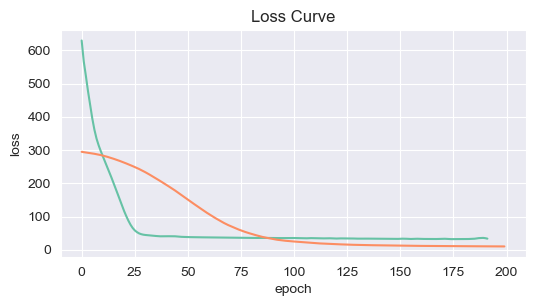

In [152]:
fig, ax = plt.subplots(1,1, figsize=(6,3), dpi=100)
ax.plot(model.loss_curve_, label="Train Set")
ax.plot(model_scaled.loss_curve_, label="Scaled Train Set")

plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('Loss Curve')
plt.plot()

### Exercise: Analysis

Try to do the following configurations and explain why the scores increased/decreased:
- For the classification example, set the `max_iter` (epoch) to `50`.
- For the regression example, set the `hidden_layer_sizes` (hidden layer and node sizes) to `(16, 2)`.
- For both examples, change the `activation` to `logistic`.

## Neural Network using Keras

**What is Keras?**
> "Keras is an API designed for human beings, not machines. Keras follows best practices for reducing cognitive load: it offers consistent & simple APIs, it minimizes the number of user actions required for common use cases, and it provides clear & actionable error messages. It also has extensive documentation and developer guides."

> "Keras is the most used deep learning framework among top-5 winning teams on Kaggle. Because Keras makes it easier to run new experiments, it empowers you to try more ideas than your competition, faster..."

For more details, please refer to <a href="https://keras.io/">keras website</a>.

<!-- sklearn has classification and regression implementations for kNN. We'll be using them in the following examples.  -->

Neural networks can be configured to solve classification and regression problems. We'll be showing examples of them in the following cells.

In [103]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

### Regression 

In [112]:
X, y = datasets.load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Original Size | Input: {X.shape}, Output: {y.shape}")
print(f"Train Set Size | Input: {X_train.shape}, Output: {y_train.shape}")
print(f"Test Set Size | Input: {X_test.shape}, Output: {y_test.shape}")

Original Size | Input: (506, 13), Output: (506,)
Train Set Size | Input: (404, 13), Output: (404,)
Test Set Size | Input: (102, 13), Output: (102,)


We will be defining a function for computing R-Squared as it is not in Keras/Tensorflow by default.

In [111]:
from keras import backend as K

def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [157]:
input_shape = X_train.shape[1]
# input_shape = X_train.shape
input_shape

13

In [174]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Dense(32, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Flatten(),
        layers.Dense(1, activation="linear"),
    ]
)

model.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_86 (Dense)             (None, 32)                448       
_________________________________________________________________
dense_87 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_88 (Dense)             (None, 32)                1056      
_________________________________________________________________
flatten_31 (Flatten)         (None, 32)                0         
_________________________________________________________________
dense_89 (Dense)             (None, 1)                 33        
Total params: 2,593
Trainable params: 2,593
Non-trainable params: 0
_________________________________________________________________


In [175]:
np.random.seed(seed)
tf.random.set_seed(seed)

model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="mean_squared_error",
    metrics=[coeff_determination, 'mean_absolute_error'],
)

model.fit(X_train, y_train, batch_size=16, epochs=100)

Epoch 1/100
26/26 [==============================] - 1s 1ms/step - loss: 336.4488 - coeff_determination: -4.3919 - mean_absolute_error: 13.8651
Epoch 2/100
26/26 [==============================] - 0s 1ms/step - loss: 84.2536 - coeff_determination: -0.0687 - mean_absolute_error: 6.7480
Epoch 3/100
26/26 [==============================] - 0s 1ms/step - loss: 71.0502 - coeff_determination: 0.1250 - mean_absolute_error: 6.0905
Epoch 4/100
26/26 [==============================] - 0s 1ms/step - loss: 66.8440 - coeff_determination: 0.1222 - mean_absolute_error: 5.7372
Epoch 5/100
26/26 [==============================] - 0s 1ms/step - loss: 71.7891 - coeff_determination: -0.0281 - mean_absolute_error: 6.1852
Epoch 6/100
26/26 [==============================] - 0s 1ms/step - loss: 75.5899 - coeff_determination: 0.0437 - mean_absolute_error: 6.2258
Epoch 7/100
26/26 [==============================] - 0s 1ms/step - loss: 65.9771 - coeff_determination: -0.2203 - mean_absolute_error: 5.9554
Epoch 8

In [176]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)
r2_score(y_test, y_pred)

0.6870563832960146

### Classification - Computer Vision

In [ ]:
# model = keras.Sequential(
#     [
#         keras.Input(shape=input_shape),
#         layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
#         layers.MaxPooling2D(pool_size=(2, 2)),
#         layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
#         layers.MaxPooling2D(pool_size=(2, 2)),
#         layers.Flatten(),
#         layers.Dropout(0.5),
#         layers.Dense(num_classes, activation="softmax"),
#     ]
# )

## End
<sup>made by **Jude Michael Teves**</sup> <br>
<sup>for comments, corrections, suggestions, please email:</sup><sup> <href>judemichaelteves@gmail.com</href> or <href>jude.teves@dlsu.edu.ph</href></sup><br>
